In [38]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import solve_ivp

In [39]:
# Number of agents
n= 5

# Sensing graph input
L = np.zeros((n,n),dtype= complex)

Llf = np.array([[-1,0],[-1j,0],[0,-2j]],dtype = complex)
Lff = np.array([[1+1j,0,-1j],[0,1+1j,-1],[-2*(1-1j),-1*(1+1j),3+1j]],dtype=complex)

L[2:n,0:2] = Llf
L[2:n,2:n] = Lff

# Communication graph input
H = np.zeros((n,n))

Hlf = np.array([[-1/2,0],[-1/2,0],[0,-1/3]])
Hff = np.array([[1,0,-1/2],[0,1,-1/2],[-1/3,-1/3,1]])

H[2:n,0:2] = Hlf
H[2:n,2:n] = Hff

Hcomp = np.zeros((n,n))
Hcomp[0:2,0:2]= np.identity(2)

Hbar = Hcomp + H

# For formation control law
eta = np.zeros((np.shape(L)[0]))
for i in range(0,np.shape(L)[0]):
    if i>=2:
        eta[i] = 0
    elif i<2:
        eta[i] = 1

# Input velocity of co-leaders
def Leader_v0(t):
    v0_real = 2*t*np.cos([0.1*t])
    v0_imag = 0.5*t*np.sin([0.1*t])
    v0 = 0.2*complex(v0_real,v0_imag)
    return v0

# Stabilization matrix (Important)
D =np.diag([1,1,5,5*np.exp(complex(0,np.pi/10)),np.exp(complex(0,-3*np.pi/4))]) 

In [40]:
#Single integrator kinematics fomration control
def single_kinematics(tsim,z_init):
    
    def formation_SIK(t,z):      
        dzdt = np.matmul(np.linalg.inv(Hbar),(-np.matmul(np.matmul(D,L),z)+np.multiply(eta,Leader_v0(t))))       
        return dzdt
    
    sol = solve_ivp(formation_SIK,[tsim[0], tsim[-1]],z_init,t_eval=tsim)

    return sol

In [41]:
#Simulation parameters
z_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j] 
tsim = np.arange(0,20,.001)

sol =single_kinematics(tsim,z_init)

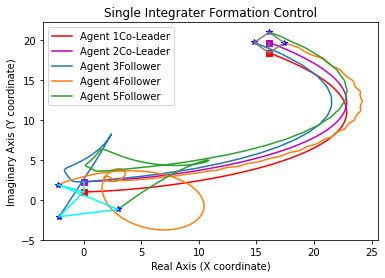

In [43]:
#Simulation Results
plt.figure(1)
for i in range(0,n):
    if i == 0 :
        loop_label = "Agent " + str(i+1) + "Co-Leader"
        plt.plot(sol.y[i].real,sol.y[i].imag,'r-',label= loop_label)
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'rs')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'rs')
    elif i == 1:
        loop_label = "Agent " + str(i+1) + "Co-Leader"
        plt.plot(sol.y[i].real,sol.y[i].imag,'m-',label= loop_label)
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'ms')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'ms')
    else:
        loop_label = "Agent " + str(i+1) + "Follower"
        plt.plot(sol.y[i].real,sol.y[i].imag,label= loop_label)
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'b*')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'b*')
    
       
# Initial positions        
plt.plot([sol.y[0][0].real,sol.y[1][0].real],[sol.y[0][0].imag,sol.y[1][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[2][0].real],[sol.y[0][0].imag,sol.y[2][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[3][0].real],[sol.y[0][0].imag,sol.y[3][0].imag],'-',color='cyan')
plt.plot([sol.y[2][0].real,sol.y[4][0].real],[sol.y[2][0].imag,sol.y[4][0].imag],'-',color='cyan')
plt.plot([sol.y[3][0].real,sol.y[4][0].real],[sol.y[3][0].imag,sol.y[4][0].imag],'-',color='cyan')
# Final positions
plt.plot([sol.y[0][-1].real,sol.y[1][-1].real],[sol.y[0][-1].imag,sol.y[1][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[2][-1].real],[sol.y[0][-1].imag,sol.y[2][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[3][-1].real],[sol.y[0][-1].imag,sol.y[3][-1].imag],'-',color='gray')
plt.plot([sol.y[2][-1].real,sol.y[4][-1].real],[sol.y[2][-1].imag,sol.y[4][-1].imag],'-',color='gray')
plt.plot([sol.y[3][-1].real,sol.y[4][-1].real],[sol.y[3][-1].imag,sol.y[4][-1].imag],'-',color='gray')

plt.title("Single Integrater Formation Control")
plt.xlabel("Real Axis (X coordinate)")
plt.ylabel("Imaginary Axis (Y coordinate)")
plt.legend(loc='best')

plt.show()

Formation Law for Double Integrator Dynamics 

In [11]:
# Input Acceleration for co-leaders 
def Leader_a0(t):
    a0_real = 3*t*np.cos([0.1*t])
    a0_imag = 2*t*np.sin([0.1*t])
    a0 = complex(a0_real,a0_imag)
    return a0

In [12]:
# Stabilization matrix (Important)
D =np.diag([1,1,2*np.exp(complex(0,-np.pi/2)),2*np.exp(complex(0,-np.pi/2)),1]) 

gamma = 10

#Commnication graph can be different from sensing graph 
'''
H = np.zeros((n,n))

Hlf = np.array([[0,-0.5],[-0.5,0],[0,0]])
Hff = np.array([[1,0,-0.5],[0,1,-0.5],[-0.5,-0.5,1]])

H[2:n,0:2] = Hlf
H[2:n,2:n] = Hff

Hcomp = np.zeros((n,n))
Hcomp[0:2,0:2]= np.identity(2)

Hbar = Hcomp + H
'''

'\nH = np.zeros((n,n))\n\nHlf = np.array([[0,-0.5],[-0.5,0],[0,0]])\nHff = np.array([[1,0,-0.5],[0,1,-0.5],[-0.5,-0.5,1]])\n\nH[2:n,0:2] = Hlf\nH[2:n,2:n] = Hff\n\nHcomp = np.zeros((n,n))\nHcomp[0:2,0:2]= np.identity(2)\n\nHbar = Hcomp + H\n'

In [13]:
#Double integrator dynamics fomration control
def double_dynamics(tsim,z_init):
    
    def formation_DID(t,x):
        z = x[::2]
        v = x[1::2]
        dzdt = v
        dvdt = np.matmul(np.linalg.inv(Hbar),(-np.matmul(np.matmul(D,L),z)-gamma*np.matmul(Hbar,v)+np.multiply(eta,Leader_a0(t))))       
       
        dxdt = np.zeros(2*n,dtype=complex)
        dxdt[::2] = dzdt
        dxdt[1::2] = dvdt
        
        return dxdt
    
    sol = solve_ivp(formation_DID,[tsim[0], tsim[-1]],z_init,t_eval=tsim)

    return sol

In [45]:
z_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j] 
v_init = [0+1j,0+2.3j,-2.1-2.1j,-2.2+1.9j,+3-1.2j] 
x_init = np.zeros(2*n,dtype=complex)
x_init[::2] = z_init
x_init[1::2] = v_init

tsim = np.arange(0,100,.001)

sol =double_dynamics(tsim,x_init)                

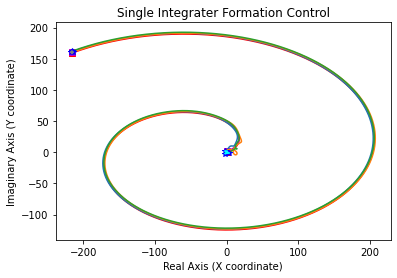

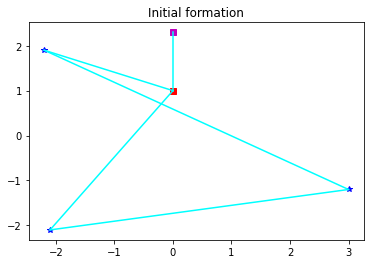

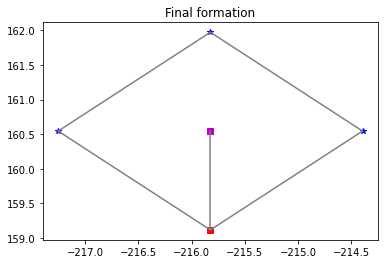

In [48]:
plt.figure(2)
for i in range(0,2*n,2):
    if i == 0 :
        plt.plot(sol.y[i].real,sol.y[i].imag,'r-')
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'rs')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'rs')
    elif i == 2:
        plt.plot(sol.y[i].real,sol.y[i].imag,'m-')
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'ms')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'ms')
    else:
        plt.plot(sol.y[i].real,sol.y[i].imag)
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'b*')
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'b*')

# Initial positions        
plt.plot([sol.y[0][0].real,sol.y[2][0].real],[sol.y[0][0].imag,sol.y[2][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[4][0].real],[sol.y[0][0].imag,sol.y[4][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[6][0].real],[sol.y[0][0].imag,sol.y[6][0].imag],'-',color='cyan')
plt.plot([sol.y[4][0].real,sol.y[8][0].real],[sol.y[4][0].imag,sol.y[8][0].imag],'-',color='cyan')
plt.plot([sol.y[6][0].real,sol.y[8][0].real],[sol.y[6][0].imag,sol.y[8][0].imag],'-',color='cyan')
# Final positions
plt.plot([sol.y[0][-1].real,sol.y[2][-1].real],[sol.y[0][-1].imag,sol.y[2][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[4][-1].real],[sol.y[0][-1].imag,sol.y[4][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[6][-1].real],[sol.y[0][-1].imag,sol.y[6][-1].imag],'-',color='gray')
plt.plot([sol.y[4][-1].real,sol.y[8][-1].real],[sol.y[4][-1].imag,sol.y[8][-1].imag],'-',color='gray')
plt.plot([sol.y[6][-1].real,sol.y[8][-1].real],[sol.y[6][-1].imag,sol.y[8][-1].imag],'-',color='gray')

plt.title("Single Integrater Formation Control")
plt.xlabel("Real Axis (X coordinate)")
plt.ylabel("Imaginary Axis (Y coordinate)")

plt.show()

#Initial Formation
plt.figure()
for i in range(0,2*n,2):
    if i == 0 :
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'rs')
    elif i == 2:
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'ms')
    else:
        plt.plot(sol.y[i][0].real,sol.y[i][0].imag,'b*')

plt.plot([sol.y[0][0].real,sol.y[2][0].real],[sol.y[0][0].imag,sol.y[2][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[4][0].real],[sol.y[0][0].imag,sol.y[4][0].imag],'-',color='cyan')
plt.plot([sol.y[0][0].real,sol.y[6][0].real],[sol.y[0][0].imag,sol.y[6][0].imag],'-',color='cyan')
plt.plot([sol.y[4][0].real,sol.y[8][0].real],[sol.y[4][0].imag,sol.y[8][0].imag],'-',color='cyan')
plt.plot([sol.y[6][0].real,sol.y[8][0].real],[sol.y[6][0].imag,sol.y[8][0].imag],'-',color='cyan')
plt.title("Initial formation")
plt.show()

#Final Formation
plt.figure()
for i in range(0,2*n,2):
    if i == 0 :
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'rs')
    elif i == 2:
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'ms')
    else:
        plt.plot(sol.y[i][-1].real,sol.y[i][-1].imag,'b*')

plt.plot([sol.y[0][-1].real,sol.y[2][-1].real],[sol.y[0][-1].imag,sol.y[2][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[4][-1].real],[sol.y[0][-1].imag,sol.y[4][-1].imag],'-',color='gray')
plt.plot([sol.y[0][-1].real,sol.y[6][-1].real],[sol.y[0][-1].imag,sol.y[6][-1].imag],'-',color='gray')
plt.plot([sol.y[4][-1].real,sol.y[8][-1].real],[sol.y[4][-1].imag,sol.y[8][-1].imag],'-',color='gray')
plt.plot([sol.y[6][-1].real,sol.y[8][-1].real],[sol.y[6][-1].imag,sol.y[8][-1].imag],'-',color='gray')
plt.title("Final formation")
plt.show()